#Mount Drive

In [13]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [14]:
cd /content/gdrive/MyDrive/Data Viz

/content/gdrive/MyDrive/Data Viz


#Importing Needed Libraries

In [1]:
!pip install geoviews
!pip install holoviews
!pip install bokeh
!pip install folium
!pip install shapely==1.8.5
!pip install cartopy
!pip install KeplerGl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.5 MB/s eta 0:00:00


In [69]:
import pandas as pd
import random
import geopandas as gpd
import numpy as np
import holoviews as hv
import networkx as nx
from holoviews import opts
from holoviews.element.graphs import layout_nodes
import folium
from shapely.geometry import LineString
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs
import geoviews.tile_sources as gts
from geoviews import opts
from shapely.geometry import Point
from keplergl import KeplerGl
from pyproj import CRS

#Generating Mock Data

In [16]:
fp = r'countries.csv'
centroids = gpd.read_file(fp)
centroids

,longitude,latitude,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry
0,-170.7007316174498,-14.305711987770538,American Samoa,AS,United States,US,None
1,166.63800339749642,19.302045812215958,United States Minor Outlying Islands,UM,United States,US,None
2,-159.78768870952257,-21.222613253399842,Cook Islands,CK,New Zealand,NZ,None
3,-149.40041671099763,-17.674684080120677,French Polynesia,PF,France,FR,None
4,-169.86878106699083,-19.05230921680393,Niue,NU,New Zealand,NZ,None
...,...,...,...,...,...,...,...
244,145.74119737203134,15.178063516432115,Northern Mariana Islands,MP,United States,US,None
245,134.57965086721052,7.534775852547396,Palau,PW,Palau,PW,None
246,98.6704990698032,59.039434214106194,Russian Federation,RU,Russian Federation,RU,None
247,-3.6516251409956983,40.365008336683836,Spain,ES,Spain,ES,None


In [49]:
fp = r'countries.geojson'
centroids = gpd.read_file(fp)
centroids

,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry
0,American Samoa,AS,United States,US,POINT (-170.70073 -14.30571)
1,United States Minor Outlying Islands,UM,United States,US,POINT (166.63800 19.30205)
2,Cook Islands,CK,New Zealand,NZ,POINT (-159.78769 -21.22261)
3,French Polynesia,PF,France,FR,POINT (-149.40042 -17.67468)
4,Niue,NU,New Zealand,NZ,POINT (-169.86878 -19.05231)
...,...,...,...,...,...
244,Northern Mariana Islands,MP,United States,US,POINT (145.74120 15.17806)
245,Palau,PW,Palau,PW,POINT (134.57965 7.53478)
246,Russian Federation,RU,Russian Federation,RU,POINT (98.67050 59.03943)
247,Spain,ES,Spain,ES,POINT (-3.65163 40.36501)


In [50]:
centroidsdf = pd.DataFrame(centroids)

In [17]:
countries = set(centroids['COUNTRY'])

In [18]:
data = pd.DataFrame(columns=['source', 'destination'])
for i in range(50):
  src, dest = random.sample(countries, 2)
  data = data.append({'source': src, 'destination': dest }, ignore_index=True)

In [24]:
coordinates = pd.DataFrame(columns=['coordinates'])

In [30]:
centroids_list = []
for i, x in centroidsdf.iterrows():
  centroids_list.append((float(x['longitude']), float(x['latitude']), x['COUNTRY']))

centres = gv.Points(centroids_list, vdims='COUNTRY').opts(global_extent=True, width=500, height=475, size=0.5, color='aqua')
centres.dframe()

,x,y,COUNTRY
0,-170.700732,-14.305712,American Samoa
1,166.638003,19.302046,United States Minor Outlying Islands
2,-159.787689,-21.222613,Cook Islands
3,-149.400417,-17.674684,French Polynesia
4,-169.868781,-19.052309,Niue
...,...,...,...
244,145.741197,15.178064,Northern Mariana Islands
245,134.579651,7.534776,Palau
246,98.670499,59.039434,Russian Federation
247,-3.651625,40.365008,Spain


,longitude,latitude,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry
0,-170.7007316174498,-14.305711987770538,American Samoa,AS,United States,US,None
1,166.63800339749642,19.302045812215958,United States Minor Outlying Islands,UM,United States,US,None
2,-159.78768870952257,-21.222613253399842,Cook Islands,CK,New Zealand,NZ,None
3,-149.40041671099763,-17.674684080120677,French Polynesia,PF,France,FR,None
4,-169.86878106699083,-19.05230921680393,Niue,NU,New Zealand,NZ,None
...,...,...,...,...,...,...,...
244,145.74119737203134,15.178063516432115,Northern Mariana Islands,MP,United States,US,None
245,134.57965086721052,7.534775852547396,Palau,PW,Palau,PW,None
246,98.6704990698032,59.039434214106194,Russian Federation,RU,Russian Federation,RU,None
247,-3.6516251409956983,40.365008336683836,Spain,ES,Spain,ES,None


In [37]:
data.to_csv("Network Log.csv")

#Prepare Data

In [ ]:
data = pd.read_csv("Network Log.csv")

In [41]:
temp = data
temp['geometry'] = np.nan

In [43]:
kepler_data = temp
folium_data = temp

In [77]:
for i, x in folium_data.iterrows():
  source = str(x['source'])
  destination = str(x['destination'])
  src_point = centroidsdf.loc[centroids['COUNTRY']==source ,'geometry'].item()
  dst_point = centroidsdf.loc[centroids['COUNTRY']==destination ,'geometry'].item()
  folium_data._set_value(i,'geometry', LineString([src_point, dst_point]))


In [53]:
coordinates = pd.DataFrame(columns=['coordinates'])

for i, x in data.iterrows():
  source = str(x['source'])
  destination = str(x['destination'])
  src_point = centroidsdf.loc[centroids['COUNTRY']==source ,'geometry'].item()
  dst_point = centroidsdf.loc[centroids['COUNTRY']==destination ,'geometry'].item()
  coordinates = coordinates.append({'coordinates': [[src_point.y, src_point.x], [dst_point.y, dst_point.x]]}, ignore_index=True)

In [82]:
geodata = gpd.GeoDataFrame(
    folium_data, geometry=folium_data['geometry'])

In [57]:
for i, x in kepler_data.iterrows():
  kepler_data.loc[i,['route_id']] =  i
  kepler_data.loc[i,['movers']] =  1
  source = str(x['source'])
  destination = str(x['destination'])
  src_point = centroidsdf.loc[centroids['COUNTRY']==source ,'geometry'].item()
  dst_point = centroidsdf.loc[centroids['COUNTRY']==destination ,'geometry'].item()
  kepler_data.loc[i,['x_origin']] =  src_point.x
  kepler_data.loc[i,['y_origin']] =  src_point.y
  kepler_data.loc[i,['x_destin']] =  dst_point.x
  kepler_data.loc[i,['y_destin']] =  dst_point.y


In [60]:
movers = gpd.GeoDataFrame(index = kepler_data['route_id'].unique())
for key, group in kepler_data.groupby('route_id'):
 
 movers.at[key, 'route_id'] = key
 
 movers.at[key, 'movers'] = int(len(group))
 
 movers.at[key, 'origin_name'] = group['destination'].unique()[0]
 movers.at[key, 'destin_name'] = group['source'].unique()[0]
 
 movers.at[key, 'x_origin'] = group['x_origin'].unique()[0]
 movers.at[key, 'y_origin'] = group['y_origin'].unique()[0]
 movers.at[key, 'x_destin'] = group['x_destin'].unique()[0]
 movers.at[key, 'y_destin'] = group['y_destin'].unique()[0]
 movers['geometry'] = [Point(originx, originy) for originx, originy in zip(kepler_data['x_origin'].to_list(), kepler_data['y_origin'].to_list())]
 
movers.head()

,route_id,movers,origin_name,destin_name,x_origin,y_origin,x_destin,y_destin,geometry
0.0,0.0,1.0,Croatia,Saint Lucia,-60.968951,13.895749,16.625761,44.911921,POINT (-60.96895 13.89575)
1.0,1.0,1.0,Turks and Caicos Islands,Marshall Islands,168.720160,7.307930,-71.740589,21.799865,POINT (168.72016 7.30793)
2.0,2.0,1.0,Brazil,France,2.194024,46.642368,-54.355207,-11.524630,POINT (2.19402 46.64237)
3.0,3.0,1.0,Palestinian Territory,Central African Republic,20.520743,6.331390,35.242512,31.930819,POINT (20.52074 6.33139)
4.0,4.0,1.0,South Korea,Belgium,4.675010,50.618214,127.762246,36.402387,POINT (4.67501 50.61821)


#Visualizing World Centroids

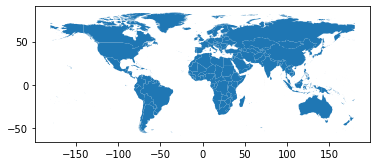

In [61]:
fp = r'world-administrative-boundaries.shp'
world = gpd.read_file(fp)
world.plot()

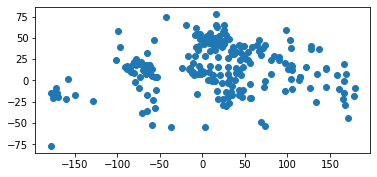

In [62]:
fp = r'countries.geojson'
centroids = gpd.read_file(fp)
centroids.plot()

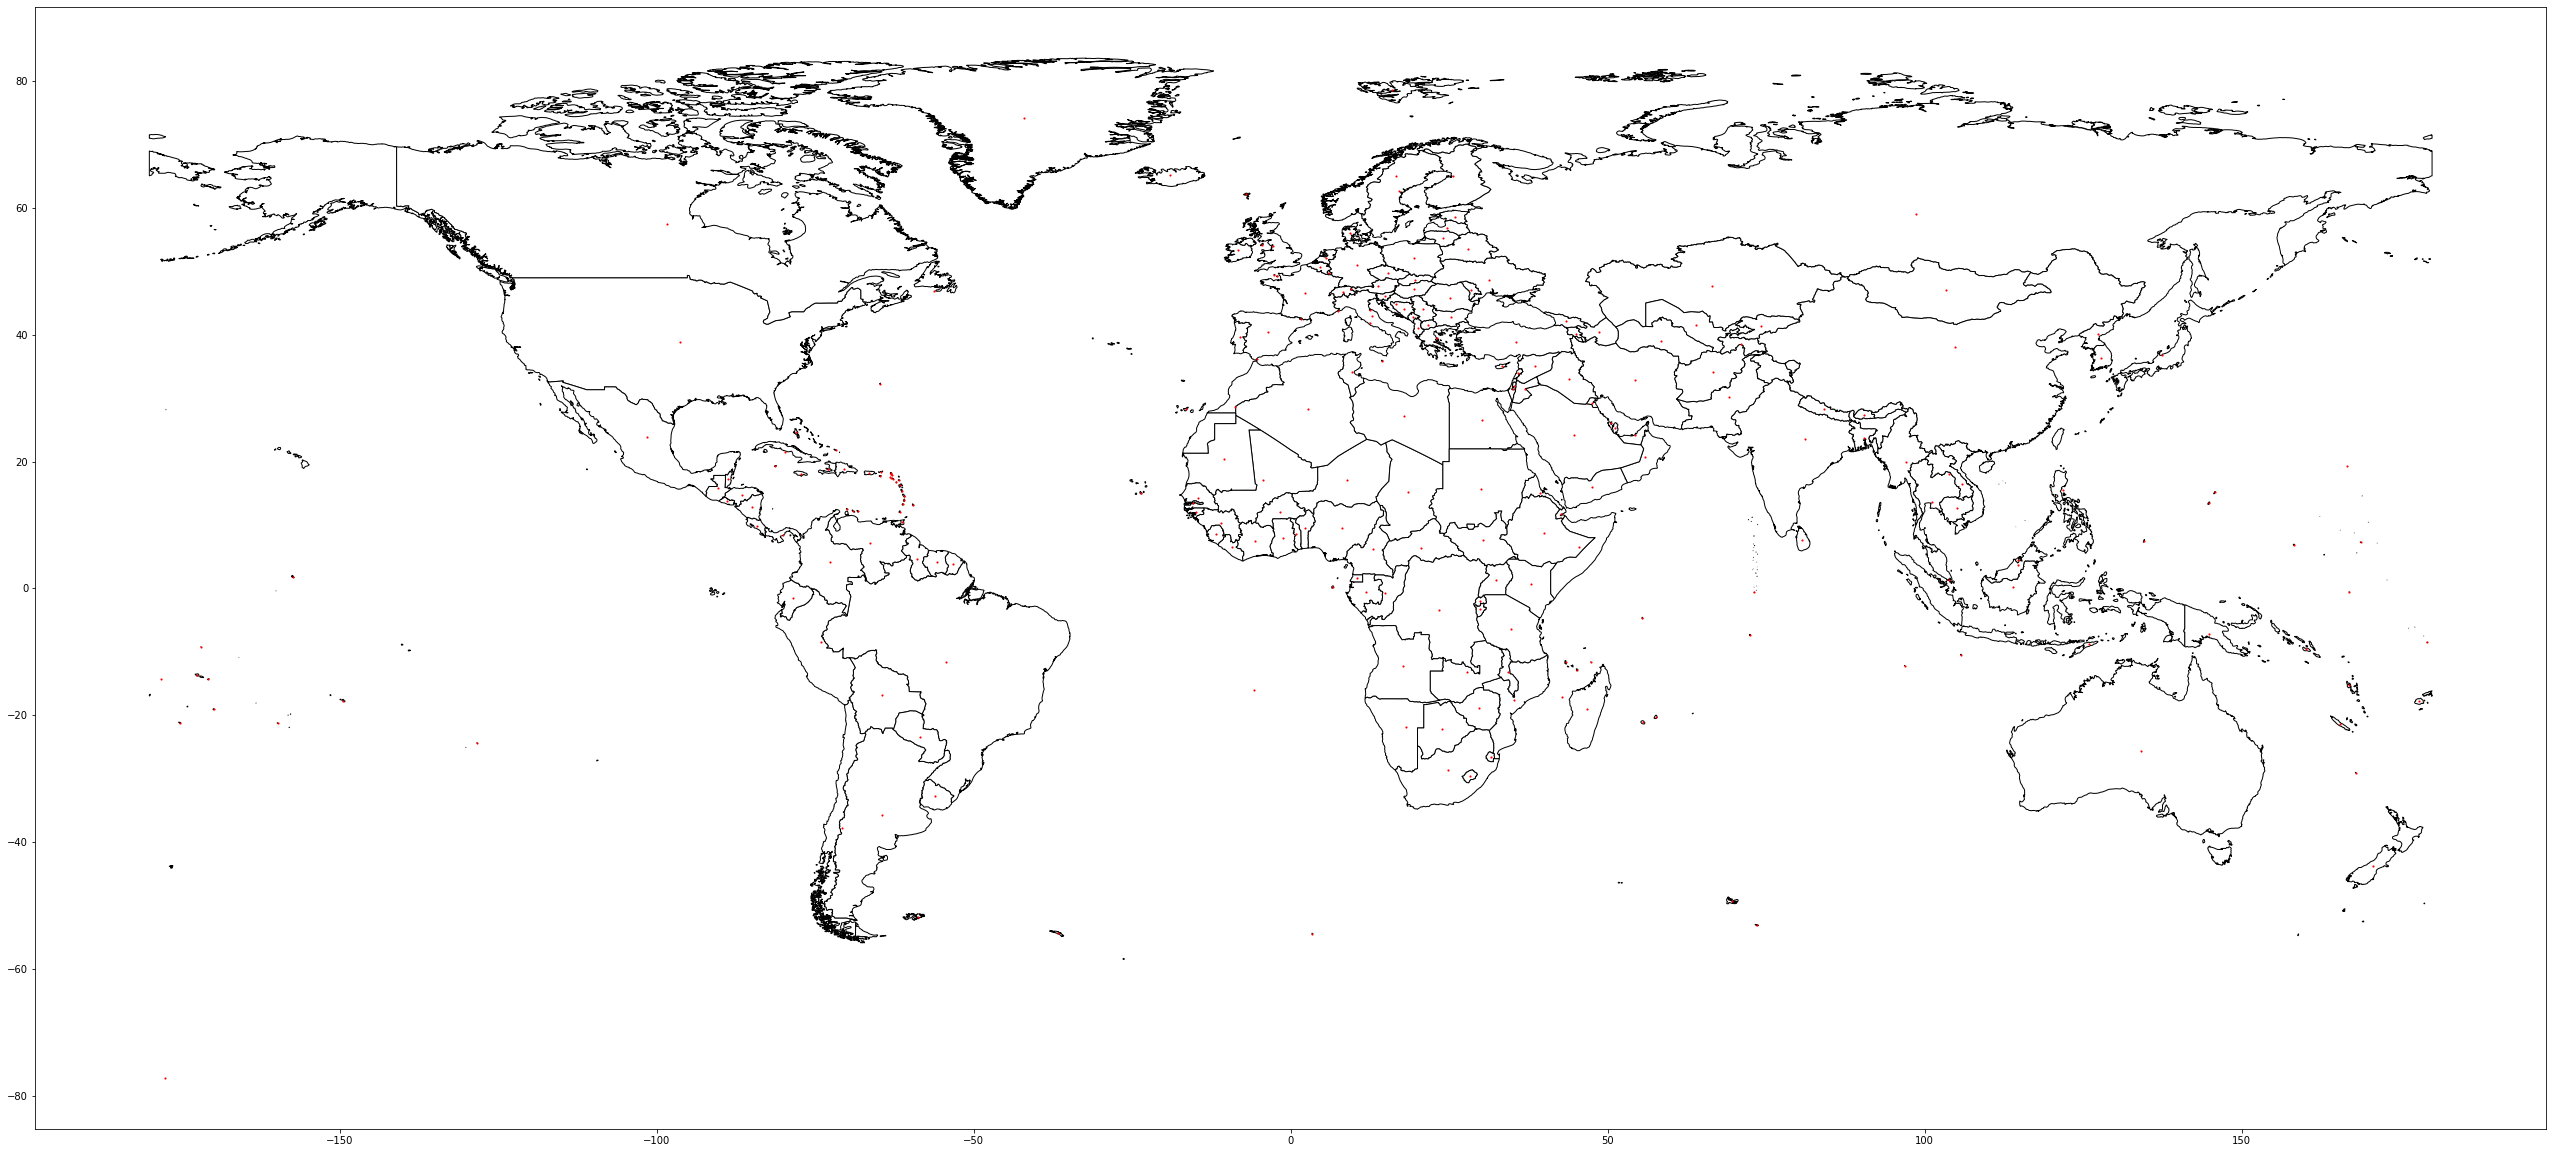

In [63]:
base = world.plot(color='white', edgecolor='black',figsize=(45, 30))
centroids.plot(ax=base, marker='.', color='red', markersize=5,figsize=(45, 30))

In [64]:
gv.extension('bokeh', 'matplotlib')
centres * gv.tile_sources.CartoMidnight()

Output hidden; open in https://colab.research.google.com to view.

In [70]:
movers.crs = CRS.from_epsg(4326)
movers = movers[['route_id', 'movers', 'x_origin', 'y_origin', 'x_destin', 'y_destin', 'geometry' ]]

In [71]:
m = KeplerGl(height=600)
m.add_data(movers, 'agg movements')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


#Visualize World Map

In [75]:
fm = folium.Map()
fm

#Flow Map On World

In [ ]:
base = world.plot(color='white', edgecolor='black',figsize=(45, 30))
geodata.plot(ax=base, marker='.', color='green', markersize=5,figsize=(45, 30))

In [ ]:
mf = folium.Map(location=[0, 0], zoom_start=3)

for i, x in coordinates.iterrows():
  line = folium.PolyLine(locations=x, weight=1)
  m.add_child(line)

mf

In [73]:
from google.colab import output
output.enable_custom_widget_manager()

In [74]:
m

KeplerGl(data={'agg movements': {'index': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,…